# Barplot

**NOT: Sütun grafikler elimizdeki kategorık degıskenlerı görselleştırmek için kullanılır.**

**Elimizdeki Veri Seti Hikayesi** 

price : dolar cinsinde fiyat (326-18,823)

carat : ağırlık (0.2-5.01)

cut : kalite(Fair,Good, Very Good, Preiumum, Ideal)

color: renk(from J(worst) to D(best))

clarity : temizliği, berraklıgı (I1 (worst) , S12, SI1, VS2, VS1, VVS2, VVS1, IF(best))

x: length in mm (0-10.74)

y: width in mm (0-58.9)

z: depth in mm(0-31.8)

depth: toplam derinlik yüzdesi = z/mean(x,y)= 2*z/(x+y)(43-79)

table : elmasın en geniş noktasına göre genişliği ( 43-95)


In [1]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df=diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# ELİMİZDE VERİ OLUNCA YAPACAGIMIZ ADIMLAR

## 1-) Veri Setine Hızlı Bakış

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


veri setinin yapısına baktık.

DataFrame tipinde 53940 gözlem birimi var. 

10 tane değişken var.

bu değişkenler: carat, cut, color, clarity, depth, table, price, x, y, z

bu değişkenlerden 3 tanesi kategorık değişken.

7 tanesini sayısal değişken rem de tuttugu boyut 3.0 mb.

## 2)Elimizdeki Sürekli Değişkenkerin Yapısını Anlamaya Çalışalım.

In [3]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


## 3-) KATEGORİK DEĞİŞKENİN SINIFLARININ FREKANSLARINA ERİŞMEK 

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

cut değişkenin sınıflarının frekanslarına erişelim.

In [7]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

color değişkenin sınıflarının frekanslarına erişelim.

In [8]:
# Ordinal Tanımlama
from pandas.api.types import CategoricalDtype

In [9]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

kategorik değişkenlerin tipini ordered şekilde programa tanıtalım. yukarıda taptıgımız ordinal tanımlama gibi.

In [10]:
 df.cut.astype(CategoricalDtype(ordered = True))

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

kategorık değişleni ordinal bir formatta sıralayalım.

In [11]:
df.cut= df.cut.astype(CategoricalDtype(ordered = True))

In [12]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

cut, color, clarity kategorık degısken

In [13]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [14]:
cut_kategoriler = ["Fair", "Good","Very Good", "Premium", "Ideal"]

In [15]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered =True))

In [16]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

bu şekilde veri setınde oldugu gibi dogru bır sırada, formda sıralamış olduk.

# Barplot (Sütun Grafiğinin Oluşturulması)

## Pandas ile görselleştirme teknıgı :

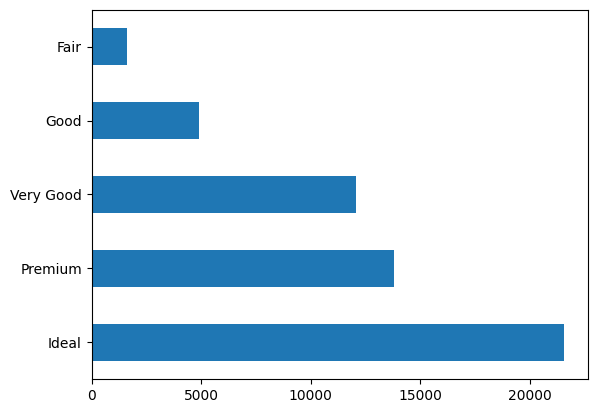

In [17]:
#Kategorık değişkenın sınıflarının frekanslarına erısım
df["cut"].value_counts().plot.barh();

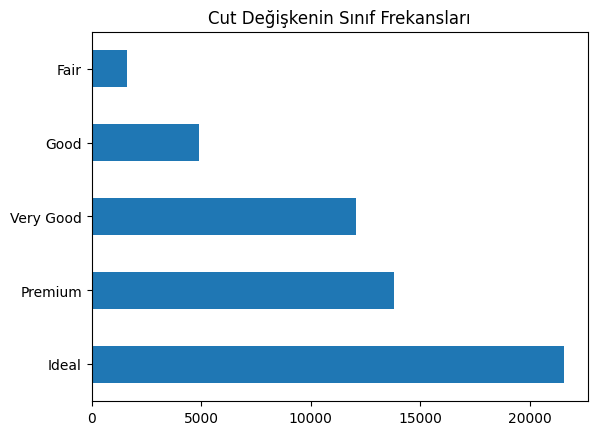

In [18]:
#set_title ile grafige baslık eklerız
df["cut"].value_counts().plot.barh().set_title("Cut Değişkenin Sınıf Frekansları");

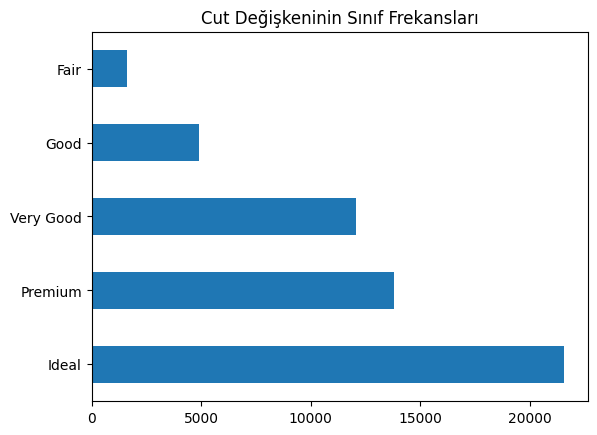

In [19]:
#bu sekılde de yapabılırız.
(df["cut"]
.value_counts()
.plot.barh()
.set_title("Cut Değişkeninin Sınıf Frekansları"));

## Seaborn ile görselleştirme teknıgı :

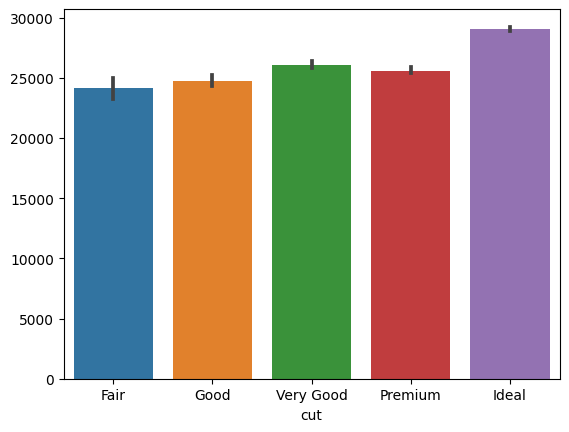

In [20]:
sns.barplot(x= "cut", y= df.cut.index, data=df);

# Sütun Grafik Çaprazlamalar

Veri seti içinde yer alan değişkenlerin birlikte değerlendirilmesi demek, 

Kırılımları göz önunde bulundurmak demek.

Değişkenlerin etkilerinin birlikte değerlendirilmesi denilebilir.

In [21]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset('diamonds')
df= diamonds.copy()
cut_kategoriler = ["Fair","Good", "Very Good", "Premium", "Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories= cut_kategoriler, ordered =True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


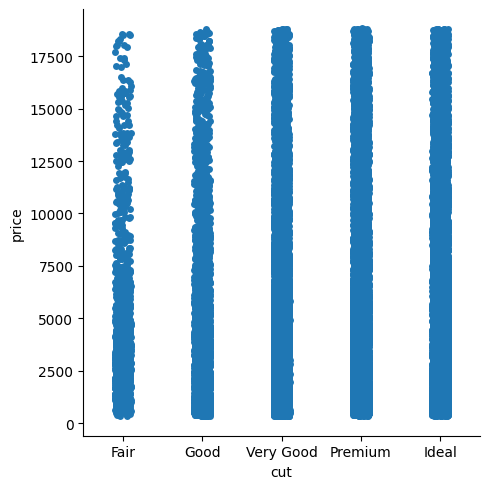

In [22]:
#x eksenımıze cut kategorık değişkenını, price sureklı  değişkenın bırbırıne etkısı incelendı. x eksenınde kategorık degıskenı
sns.catplot(x= "cut", y = "price", data = df);
#kalıte arttıkca fiyat artar.

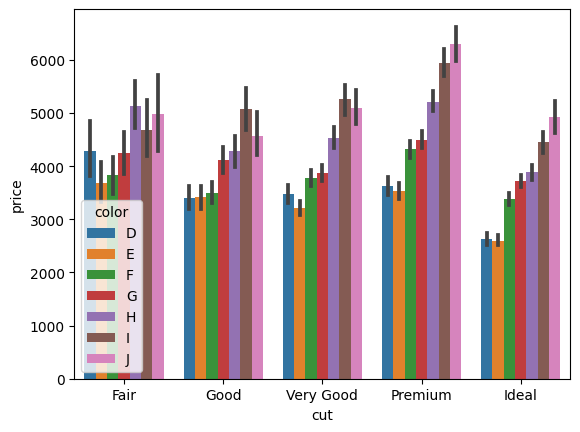

In [23]:
#bir boyut daha ekleyelım hue argumanı ıle color kategorık degısken 
sns.barplot(x="cut", y="price", hue= "color", data = df);

In [24]:
#fiayata göre ortalama değerleri aldık. kalıte ve renk bazında :
df.groupby(["cut", "color"]) ["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

# HİSTOGRAM VE YOĞUNLUK GRAFİKLERİ

**NOT: sayısal değişkenler için kullanılan, saysal değişkenlerin dagılımını gösteririr.Histogram elimizdeki sayısal değişkenin değerlerini belirli aralıklara böler, belirli aralıklardaki ilgili değerlerin gözlem ve frekanslarını yansıtır. ornegın 0 ıle 100 arasında bu kadar deer gözlenmiş. 100 ile 200 arasındda şu kadar değer gozlenmiş gibi**

In [25]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df= diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12852\3189028888.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price, kde = False);


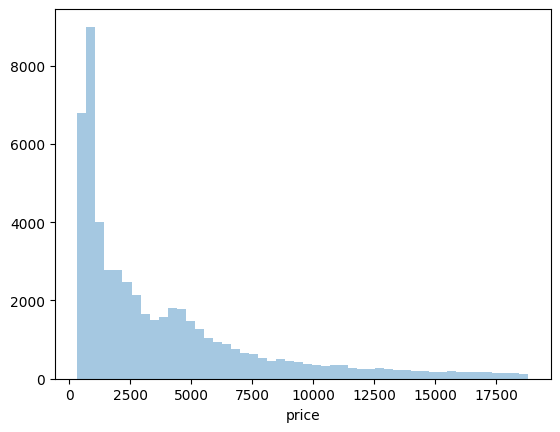

In [26]:
#sayısal değişkenlerin histogramı
sns.distplot(df.price, kde = False);

In [27]:
?sns.distplot

Signature:
sns.distplot(
    a=None,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
    x=None,
)
Docstring:
DEPRECATED

This function has been deprecated and will be removed in seaborn v0.14.0.
It has been replaced by :func:`histplot` and :func:`displot`, two functions
with a modern API and many more capabilities.

For a guide to updating, please see this notebook:

https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751
File:      c:\users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py
Type:      function


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12852\2184489247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price, bins= 1000, kde = False);


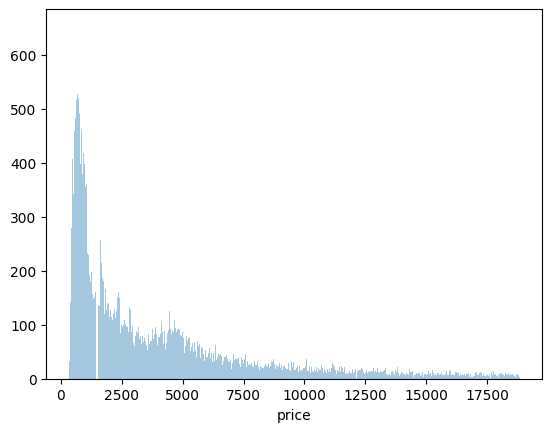

In [28]:
#bins argumanı hassaslaşma ifadesidir. bins ifadesi kuculdukce kutu değerleri artar. bıns değeri artarsa kutular incelenir.
sns.distplot(df.price, bins= 1000, kde = False);

değeri 1000 yapınca grafik daha hassaslasmıs durumda oluyor.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12852\2756800141.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price, bins= 10, kde = False);


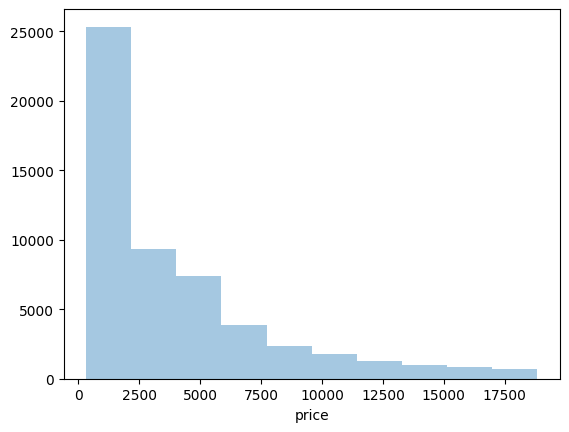

In [29]:
sns.distplot(df.price, bins= 10, kde = False);

sankı 10 tane sütun varmış gıbı olusturulmaya çalışılır. dolayısıyla bıns değeri kuculdukce sutun genıslıgı kuculur.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12852\3038031616.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price);


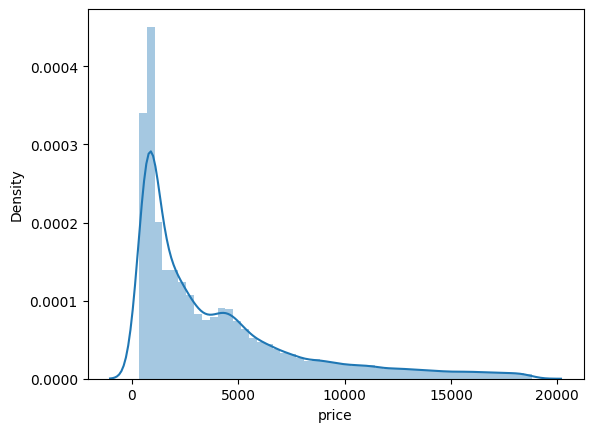

In [30]:
#yogunluk ve hıstogram grafıgı
sns.distplot(df.price);

olasılık yogunluk fonksıyonudur.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12852\86932058.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price, hist= False)


<AxesSubplot: xlabel='price', ylabel='Density'>

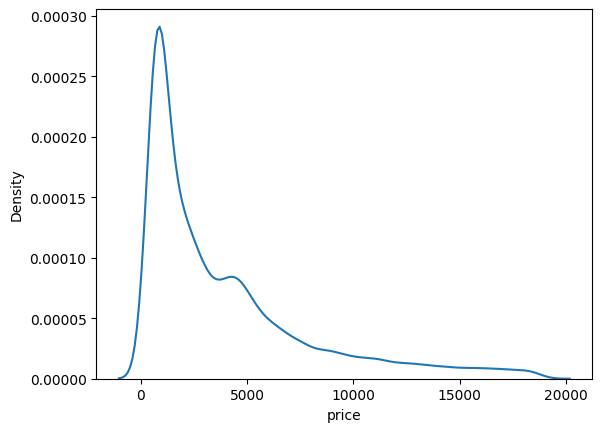

In [31]:
# sadece Yogunluk grafiği
sns.distplot(df.price, hist= False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12852\3540008824.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.price, shade=True);


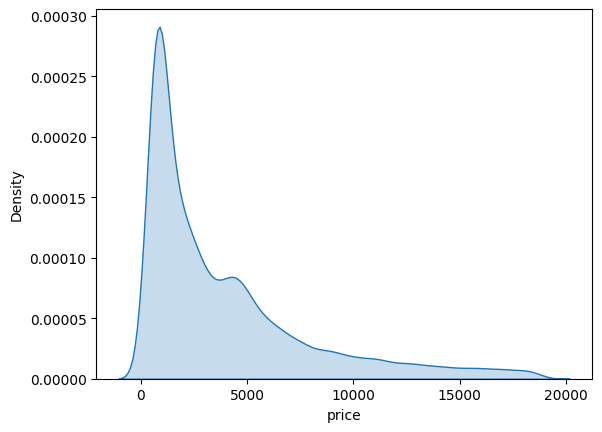

In [32]:
sns.kdeplot(df.price, shade=True);

**NOT:Ne zaman yogunlugu kullanıp, ne zaman histogramı kullanmalıyız:**

İkiside bir sayısal degıskenın dağılımın konumlanmasını, dağılmasını ifade etmek için kullanılır. Dolayısıyla her ıkısıde  kullanılabılır.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12852\1839991158.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price, bins= 100, kde = False);


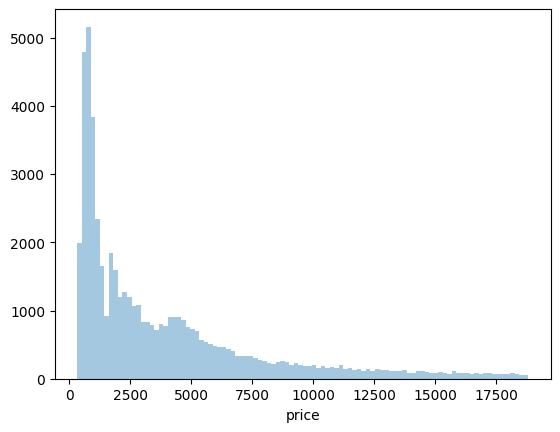

In [33]:
sns.distplot(df.price, bins= 100, kde = False);

In [34]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12852\3910415286.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.price, shade=True);


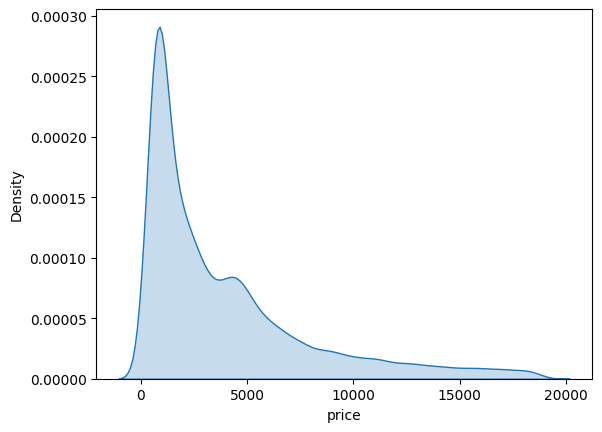

In [35]:
#yogunluk grafıgının altını boyayarak gösterme:
sns.kdeplot(df.price, shade=True);

# Histogram ve Yoğunluk Çaprazlamaları

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

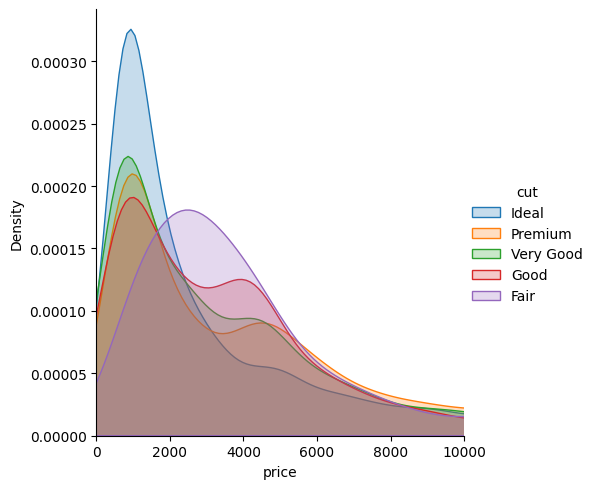

In [36]:
(sns
 .FacetGrid(df,
               hue="cut",
               height = 5,
               xlim= (0,10000))
.map(sns.kdeplot, "price", shade= True)
.add_legend()
) ;

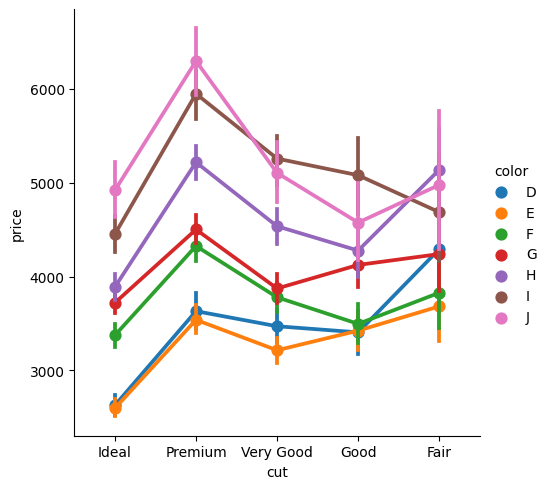

In [37]:
sns.catplot(x = "cut", y = "price" , hue = "color", kind = "point", data= df);